In [ ]:
pip install matplotlib paddleocr opencv-python

In [5]:
pip install --upgrade pdfminer.six

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
import cv2 as cv2
import os
import hashlib
import numpy as np

In [5]:
import os
os.getcwd()

'E:\\Works\\narendra_tasks\\invoice-ocr\\docai\\pocr'

In [ ]:
#!git clone https://github.com/PaddlePaddle/PaddleOCR

In [205]:
ocr_model = PaddleOCR(lang='hi', use_gpu=True)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar to C:\Users\Narendra/.paddleocr/whl\det\ml\Multilingual_PP-OCRv3_det_infer\Multilingual_PP-OCRv3_det_infer.tar


100%|███████████████████████████████| 3.85M/3.85M [00:12<00:00, 314kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/multilingual/devanagari_PP-OCRv4_rec_infer.tar to C:\Users\Narendra/.paddleocr/whl\rec\devanagari\devanagari_PP-OCRv4_rec_infer\devanagari_PP-OCRv4_rec_infer.tar


100%|███████████████████████████████| 7.93M/7.93M [00:34<00:00, 229kiB/s]


[2024/03/11 19:14:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Narendra/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Narendra/.paddleocr/whl\\rec\\devanagari\\devanagari_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320

In [1]:
import os
print(os.getcwd())

E:\Works\narendra_tasks\invoice-ocr\docai\pocr


In [ ]:
img_folder = "E:/Works/narendra_tasks/invoice-ocr/docai/bill-pdf-images"
img_name = r"_adani-152137340_Nov-23.pdf_page_1.png"
img_path = f"{img_folder}/{img_name}"
img = Image.open(img_path)

In [202]:
img_folder = "E:/Works/narendra_tasks/invoice-ocr/docai/pocr/template_data/invoice-templates-images"
img_name = r"BEST_Commercial_LT II (C)_page_1.png"
img_path = f"{img_folder}/{img_name}"
img = Image.open(img_path)

In [203]:
img = np.asarray(img)
image_height, image_width = img.shape[:2]

In [204]:
print(img_name,image_height,image_width)

BEST_Commercial_LT II (C)_page_1.png 3509 2480


In [206]:
result = ocr_model.ocr(img)

[2024/03/11 19:15:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/11 19:15:53] ppocr DEBUG: dt_boxes num : 325, elapsed : 1.1374280452728271
[2024/03/11 19:17:05] ppocr DEBUG: rec_res num  : 325, elapsed : 72.02557945251465


In [207]:
print(result)

[[[[[738.0, 102.0], [912.0, 128.0], [897.0, 227.0], [723.0, 201.0]], ('वधुत', 0.9975579380989075)], [[[1129.0, 117.0], [1299.0, 117.0], [1299.0, 197.0], [1129.0, 197.0]], ('आिण', 0.9980457425117493)], [[[1313.0, 108.0], [1551.0, 122.0], [1547.0, 202.0], [1309.0, 189.0]], ('पिरवहन', 0.9749414324760437)], [[[463.0, 119.0], [721.0, 100.0], [730.0, 210.0], [471.0, 229.0]], ('बृहनुंबई', 0.9078595638275146)], [[[908.0, 124.0], [1118.0, 124.0], [1118.0, 216.0], [908.0, 216.0]], ('पुरवठा', 0.9999379515647888)], [[[1561.0, 128.0], [1757.0, 128.0], [1757.0, 194.0], [1561.0, 194.0]], ('उपक़म', 0.9977007508277893)], [[[1919.0, 161.0], [2104.0, 161.0], [2104.0, 197.0], [1919.0, 197.0]], ('Ward Office', 0.9995734691619873)], [[[2107.0, 161.0], [2244.0, 161.0], [2244.0, 197.0], [2107.0, 197.0]], ('Address:', 0.9912183284759521)], [[[873.0, 225.0], [1044.0, 210.0], [1050.0, 276.0], [878.0, 290.0]], ('बहनुंबई', 0.9205283522605896)], [[[1048.0, 223.0], [1325.0, 223.0], [1325.0, 274.0], [1048.0, 274.0]], 

In [208]:
    layout_info = []
    for line in result:
        for word_info in line:
            text = word_info[-1]
            points = word_info[0]
            layout_info.append({"text": text, "points": points})

In [215]:
print(layout_info)

In [217]:
for ward1 in zip(layout_info):
    print(ward1)

({'text': ('वधुत', 0.9975579380989075), 'points': [[738.0, 102.0], [912.0, 128.0], [897.0, 227.0], [723.0, 201.0]]},)
({'text': ('आिण', 0.9980457425117493), 'points': [[1129.0, 117.0], [1299.0, 117.0], [1299.0, 197.0], [1129.0, 197.0]]},)
({'text': ('पिरवहन', 0.9749414324760437), 'points': [[1313.0, 108.0], [1551.0, 122.0], [1547.0, 202.0], [1309.0, 189.0]]},)
({'text': ('बृहनुंबई', 0.9078595638275146), 'points': [[463.0, 119.0], [721.0, 100.0], [730.0, 210.0], [471.0, 229.0]]},)
({'text': ('पुरवठा', 0.9999379515647888), 'points': [[908.0, 124.0], [1118.0, 124.0], [1118.0, 216.0], [908.0, 216.0]]},)
({'text': ('उपक़म', 0.9977007508277893), 'points': [[1561.0, 128.0], [1757.0, 128.0], [1757.0, 194.0], [1561.0, 194.0]]},)
({'text': ('Ward Office', 0.9995734691619873), 'points': [[1919.0, 161.0], [2104.0, 161.0], [2104.0, 197.0], [1919.0, 197.0]]},)
({'text': ('Address:', 0.9912183284759521), 'points': [[2107.0, 161.0], [2244.0, 161.0], [2244.0, 197.0], [2107.0, 197.0]]},)
({'text': ('बहनु

In [ ]:
  data = []

  # Loop through each detected text block
  for i, res in enumerate(result[0]):
    # Extract bounding box coordinates
    print(res[0])
    #bbox = text["box"]
    x_min, y_min, x_max, y_max = bbox

    # Create Label Studio annotation object
    annotation = {
      "image": img_path,  # Replace with actual image URL for Label Studio
      "regions": [
        {
          "type": "rectangle",  # Assuming text regions are rectangular
          "points": [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]],
          "text": text["text"]
        }
      ]
    }

    # Add annotation to data list
    data.append(annotation)

  # Convert data to JSON format
  print(json.dumps(data, indent=2))

In [ ]:
import paddleocr
from shapely.geometry import Polygon

In [ ]:
# Function to extract text and bounding box from an image using PaddleOCR
def extract_text_and_bbox(image_path):
    result = ocr_model.ocr(image_path, cls=True)
    text_and_bbox = [(element[-1][0], element[0]) for line in result for element in line]
    return text_and_bbox

# Example image paths
image_paths = [f"{img_folder}/Adani_Commercial_HT II_page_1.png", f"{img_folder}/Adani_Residential_LT I (B)_page_1.png", f"{img_folder}/BEST_Commercial_LT II (C)_page_2.png"]  # Add your actual image paths

# Define the region of interest
roi_polygon = Polygon([(937.0, 36.0), (1198.0, 44.0), (1196.0, 96.0), (935.0, 87.0)])  # Replace with your actual coordinates

# Function to check which polygon matches the region in an image
def matching_polygon(image_path):
    text_and_bbox = extract_text_and_bbox(image_path)
    for idx, (text, bbox) in enumerate(text_and_bbox):
        bbox_polygon = Polygon(bbox)
        if bbox_polygon.equals_exact(point1, None, tolerance=0.2)(roi_polygon):
            return idx, text
    return None, None

# Check which polygon matches the region in each image
for image_path in image_paths:
    matching_index, matched_text = matching_polygon(image_path)
    if matching_index is not None:
        print(f"Region matched in {image_path}. Polygon Index: {matching_index}, Text: {matched_text}")
    else:
        print(f"No matching region in {image_path}")


In [ ]:
def generate_unique_id(bbox, normalized_bbox):
  """
  Generates a unique identifier for a bounding box based on its relative position and area.

  Args:
      bbox: A list of four coordinates representing the bounding box in the format
          [xmin, ymin, xmax, ymax].
      normalized_bbox: A dictionary containing normalized bounding box coordinates.

  Returns:
      A unique string identifier for the bounding box.
  """
  # Calculate area
  area = normalized_bbox['width'] * normalized_bbox['height']

  # Combine data for hashing
  combined_data = sorted([normalized_bbox['x'], normalized_bbox['y'],
                           normalized_bbox['width'], normalized_bbox['height'], area])

  # Hash the combined data
  bbox_hash = hashlib.sha256(str(combined_data).encode('utf-8')).hexdigest()

  return bbox_hash

In [ ]:
import json

data = []

for i, res in enumerate(result[0]):
    # Store the results in a dictionary
    co_ord = res[0]
    four_co_ord = [co_ord[0][0],co_ord[1][1],co_ord[2][0]-co_ord[0][0],co_ord[2][1]-co_ord[1][1]]
    normalized_bbox = {
    'x': 100 * four_co_ord[0] / image_width,
    'y': 100 * four_co_ord[1] / image_height,
    'width': 100 * four_co_ord[2] / image_width,
    'height': 100 * four_co_ord[3] / image_height,
    'rotation': 0
    }
    region_id = generate_unique_id(four_co_ord, normalized_bbox)
    
    #region_id = hashlib.sha256(str(sorted_bbox).encode('utf-8')).hexdigest()
    #region_id = hashlib.sha256(str(combined_data).encode('utf-8')).hexdigest()
    #bbox_normal_str = '_'.join(map(str, bbox_normal))
    #region_id = hashlib.sha256(bbox_normal_str.encode()).hexdigest()[:10]

    image_results = {"id": i,"region_id":region_id,"bbox_normal":normalized_bbox,"bbox":res[0],"text_result": res[1][0]}
    data.append(image_results)
    i += 1
    
template_file = "template.txt"

with open(template_file, "w") as f:
    for item in data:
        f.write(json.dumps(item) + "\n")

In [ ]:
# Initialize an empty list to store the read data
data_list = []

# Read each line from the file and append it to the list
with open(template_file, "r") as f:
    for line in f:
        # Use strip() to remove newline characters and other whitespaces
        data_list.append(line.strip())

# Print the contents of the list
#print(data_list)
for item in data_list:
    print(item)

In [ ]:
img_folder = "E:/Works/narendra_tasks/invoice-ocr/docai/pocr/template_data/invoice-templates-images"
img_name = r"BEST_Commercial_LT II (C)_page_1.png"
img_path = f"{img_folder}/{img_name}"
img = Image.open(img_path)

In [ ]:
from shapely.geometry import Polygon

# Example normalized bounding boxes
normalized_bbox1 = {
    'x': 3.715670436187399,
    'y': 9.914529914529915,
    'width': 15.508885298869144,
    'height': 1.0256410256410255,
    'rotation': 0
}

normalized_bbox2 = {
    'x': 3.717171717171717,
    'y': 9.888857224280422,
    'width': 15.474747474747474,
    'height': 1.0544314619549728,
    'rotation': 0
}

# Create Polygon objects from normalized bounding boxes
polygon1 = Polygon([(normalized_bbox1['x'], normalized_bbox1['y']),
                    (normalized_bbox1['x'] + normalized_bbox1['width'], normalized_bbox1['y']),
                    (normalized_bbox1['x'] + normalized_bbox1['width'], normalized_bbox1['y'] + normalized_bbox1['height']),
                    (normalized_bbox1['x'], normalized_bbox1['y'] + normalized_bbox1['height'])])

polygon2 = Polygon([(normalized_bbox2['x'], normalized_bbox2['y']),
                    (normalized_bbox2['x'] + normalized_bbox2['width'], normalized_bbox2['y']),
                    (normalized_bbox2['x'] + normalized_bbox2['width'], normalized_bbox2['y'] + normalized_bbox2['height']),
                    (normalized_bbox2['x'], normalized_bbox2['y'] + normalized_bbox2['height'])])

# Define a tolerance value (adjust as needed)
#tolerance = 0.448491375793477
tolerance = 0.7669492935950615

# Check if the polygons are equal within the specified tolerance
if polygon1.equals_exact(polygon2, tolerance):
    print("Bounding boxes are equal within the specified tolerance.")
else:
    print("Bounding boxes are not equal within the specified tolerance.")


In [21]:
normalized_bbox1 = {
    'x': 53.392568659127626,
    'y': 17.264957264957264,
    'width': 3.4733441033925687,
    'height': 1.1965811965811965,
    'rotation': 0
}

normalized_bbox2 = {
    'x': 53.554119547657514,
    'y': 18.746438746438745,
    'width': 3.4733441033925687,
    'height': 1.1396011396011396,
    'rotation': 0
}

# Calculate the maximum difference for each attribute
differences = [abs(normalized_bbox1[key] - normalized_bbox2[key]) for key in normalized_bbox1]

# Use the maximum difference as the tolerance
tolerance = max(differences)

print("Calculated Tolerance:", tolerance)


Calculated Tolerance: 1.481481481481481


In [ ]:
print(len(result[0]))

In [ ]:
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [ ]:
img = cv2.imread(img_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15, 15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)

# show the image using matplotlib
plt.imshow(annotated)
plt.show()

## PaddleOCR to Label Studio - Dataset

import os
from paddleocr import PaddleOCR
from PIL import Image, ImageDraw, ImageFont
import json
from uuid import uuid4
import numpy as np

In [ ]:
images_folder_path  = "E:/Works/narendra_tasks/invoice-ocr/sample_bills_bakcup19Nov23/invoice-templates-images-small"

In [ ]:
from paddleocr import PaddleOCR
from tqdm import tqdm  # Optional for progress bar
from uuid import uuid4
import json
import os

In [ ]:
# OCR engine
ocr = PaddleOCR(use_angle_cls=False, 
                lang='en',
                  rec=False,
                  use_gpu=True
                ) # need to run only once to download and load model into memory 

### Testing

In [ ]:
paddle_data = [[[[[46.0, 31.0], [144.0, 31.0], [144.0, 69.0], [46.0, 69.0]], ('adani', 0.9994605779647827)], [[[472.0, 24.0], [595.0, 24.0], [595.0, 44.0], [472.0, 44.0]], ('BILL OF SUPPLY', 0.9564924836158752)], [[[826.0, 27.0], [990.0, 33.0], [989.0, 64.0], [825.0, 58.0]], ('Electric 429510', 0.9570978283882141)], [[[1013.0, 29.0], [1083.0, 29.0], [1083.0, 42.0], [1013.0, 42.0]], ('口', 0.6098620295524597)], [[[483.0, 59.0], [586.0, 59.0], [586.0, 79.0], [483.0, 79.0]], ('COMMERCIAL', 0.992224395275116)], [[[830.0, 53.0], [896.0, 57.0], [894.0, 77.0], [829.0, 73.0]], ('Smiles', 0.9795175194740295)], [[[49.0, 69.0], [139.0, 74.0], [137.0, 99.0], [47.0, 95.0]], ('Electricity', 0.9976789951324463)], [[[899.0, 60.0], [989.0, 60.0], [989.0, 80.0], [899.0, 80.0]], ('Points Earned', 0.997531533241272)], [[[755.0, 79.0], [787.0, 79.0], [787.0, 93.0], [755.0, 93.0]], ('esharorg', 0.7475082278251648)], [[[52.0, 128.0], [396.0, 128.0], [396.0, 152.0], [52.0, 152.0]], ('KingstONe PrOperty SerVice LiMited', 0.7545059323310852)], [[[453.0, 130.0], [520.0, 130.0], [520.0, 150.0], [453.0, 150.0]], ('BILL DATE', 0.9575764536857605)], [[[672.0, 130.0], [776.0, 130.0], [776.0, 148.0], [672.0, 148.0]], ('METER STATUS', 0.9735255241394043)], [[[831.0, 130.0], [936.0, 130.0], [936.0, 150.0], [831.0, 150.0]], ('CYCLE NUMBER', 0.9802692532539368)], [[[1004.0, 132.0], [1113.0, 132.0], [1113.0, 150.0], [1004.0, 150.0]], ('TYPE OF SUPPLY', 0.9948244690895081)], [[[53.0, 150.0], [376.0, 150.0], [376.0, 174.0], [53.0, 174.0]], ('COMMERZOBEROIREALTYLIMITEDOBEROI', 0.9828959703445435)], [[[453.0, 154.0], [540.0, 154.0], [540.0, 174.0], [453.0, 174.0]], ('01-12-2023', 0.9944678544998169)], [[[671.0, 150.0], [726.0, 150.0], [726.0, 176.0], [671.0, 176.0]], ('Active', 0.9981696009635925)], [[[829.0, 152.0], [855.0, 152.0], [855.0, 174.0], [829.0, 174.0]], ('31', 0.9986428618431091)], [[[53.0, 166.0], [420.0, 166.0], [420.0, 190.0], [53.0, 190.0]], ('INTERNATIONAL BUSINESSPARK OBEROI GARDEN', 0.9578447341918945)], [[[53.0, 183.0], [350.0, 183.0], [350.0, 207.0], [53.0, 207.0]], ('CITY GOREGAON EAST MUMBAI 400063', 0.9798238277435303)], [[[451.0, 186.0], [501.0, 186.0], [501.0, 207.0], [451.0, 207.0]], ('TARIFF', 0.9970769882202148)], [[[672.0, 186.0], [800.0, 186.0], [800.0, 207.0], [672.0, 207.0]], ('CONNECTION DATE', 0.9720479249954224)], [[[829.0, 185.0], [1098.0, 185.0], [1098.0, 208.0], [829.0, 208.0]], ('CONTRACT DEMAND (KVA) BILL NUMBER', 0.9769701957702637)], [[[52.0, 203.0], [109.0, 203.0], [109.0, 229.0], [52.0, 229.0]], ('Mobile', 0.9708277583122253)], [[[105.0, 207.0], [140.0, 207.0], [140.0, 227.0], [105.0, 227.0]], ('：', 0.8738252520561218)], [[[129.0, 203.0], [228.0, 203.0], [228.0, 229.0], [129.0, 229.0]], ('7.******19', 0.7990669012069702)], [[[451.0, 207.0], [492.0, 207.0], [492.0, 227.0], [451.0, 227.0]], ('HT II', 0.8964422345161438)], [[[674.0, 207.0], [759.0, 207.0], [759.0, 227.0], [674.0, 227.0]], ('01-11-2021', 0.9955585598945618)], [[[831.0, 207.0], [893.0, 207.0], [893.0, 227.0], [831.0, 227.0]], ('956.00', 0.9995898604393005)], [[[1006.0, 208.0], [1120.0, 208.0], [1120.0, 227.0], [1006.0, 227.0]], ('100013531423', 0.999262809753418)], [[[53.0, 229.0], [99.0, 229.0], [99.0, 249.0], [53.0, 249.0]], ('Email', 0.9428836703300476)], [[[114.0, 232.0], [138.0, 232.0], [138.0, 247.0], [114.0, 247.0]], ('：', 0.8991841673851013)], [[[134.0, 231.0], [201.0, 224.0], [203.0, 244.0], [136.0, 251.0]], ('pmsb***', 0.9491977691650391)], [[[207.0, 227.0], [312.0, 229.0], [311.0, 249.0], [206.0, 247.0]], ('***ireality.com', 0.9537246823310852)], [[[451.0, 241.0], [602.0, 241.0], [602.0, 265.0], [451.0, 265.0]], ('BILL DISTRIBUTION NO.', 0.9807549715042114)], [[[674.0, 243.0], [779.0, 243.0], [779.0, 263.0], [674.0, 263.0]], ('BILLING STATUS', 0.9953063130378723)], [[[829.0, 243.0], [991.0, 245.0], [991.0, 265.0], [829.0, 263.0]], ('PRESENT READING DATE', 0.9675768613815308)], [[[1004.0, 241.0], [1170.0, 241.0], [1170.0, 265.0], [1004.0, 265.0]], (' PREVIOUS READING DATE', 0.9676786065101624)], [[[53.0, 252.0], [90.0, 252.0], [90.0, 274.0], [53.0, 274.0]], ('PAN', 0.9983331561088562)], [[[116.0, 256.0], [144.0, 256.0], [144.0, 274.0], [116.0, 274.0]], ('：', 0.9116072654724121)], [[[136.0, 252.0], [221.0, 252.0], [221.0, 272.0], [136.0, 272.0]], ('AA*****16P', 0.9483206868171692)], [[[451.0, 261.0], [637.0, 261.0], [637.0, 285.0], [451.0, 285.0]], ('Malad/Dindoshi/31/M03/', 0.9988378286361694)], [[[672.0, 265.0], [731.0, 265.0], [731.0, 285.0], [672.0, 285.0]], ('Regular', 0.9939704537391663)], [[[831.0, 265.0], [919.0, 265.0], [919.0, 283.0], [831.0, 283.0]], ('30-11-2023', 0.9937273263931274)], [[[1004.0, 263.0], [1091.0, 263.0], [1091.0, 283.0], [1004.0, 283.0]], ('31-10-2023', 0.9950480461120605)], [[[53.0, 274.0], [88.0, 274.0], [88.0, 296.0], [53.0, 296.0]], ('GST', 0.9995937347412109)], [[[120.0, 282.0], [129.0, 282.0], [129.0, 292.0], [120.0, 292.0]], ('：', 0.5396242141723633)], [[[59.0, 364.0], [94.0, 364.0], [94.0, 377.0], [59.0, 377.0]], ('口', 0.644167959690094)], [[[192.0, 362.0], [385.0, 362.0], [385.0, 386.0], [192.0, 386.0]], ('CA N0:153144669', 0.9952465295791626)], [[[426.0, 360.0], [501.0, 360.0], [501.0, 380.0], [426.0, 380.0]], ('Bill Month', 0.9434829950332642)], [[[669.0, 356.0], [792.0, 360.0], [792.0, 386.0], [668.0, 382.0]], ('Units Consumed', 0.9977712631225586)], [[[838.0, 360.0], [971.0, 360.0], [971.0, 380.0], [838.0, 380.0]], ('Current Month Bill', 0.9423904418945312)], [[[1006.0, 356.0], [1166.0, 358.0], [1166.0, 384.0], [1006.0, 382.0]], (' Previous Outstanding', 0.9822415113449097)], [[[426.0, 389.0], [499.0, 389.0], [499.0, 410.0], [426.0, 410.0]], ('NOV-23', 0.9972640872001648)], [[[672.0, 389.0], [752.0, 389.0], [752.0, 410.0], [672.0, 410.0]], ('148260', 0.9995923638343811)], [[[836.0, 389.0], [965.0, 389.0], [965.0, 410.0], [836.0, 410.0]], ('1759534.69', 0.9985114336013794)], [[[1010.0, 389.0], [1105.0, 389.0], [1105.0, 410.0], [1010.0, 410.0]], ('17201.57', 0.9983676075935364)], [[[192.0, 400.0], [376.0, 400.0], [376.0, 426.0], [192.0, 426.0]], ('1776840.00*', 0.9988519549369812)], [[[424.0, 411.0], [608.0, 413.0], [608.0, 433.0], [424.0, 431.0]], ('BillPeriod:01-11-2023-30.11.2023', 0.9433732032775879)], [[[672.0, 413.0], [800.0, 413.0], [800.0, 433.0], [672.0, 433.0]], ('Previous Units : 159900', 0.9863226413726807)], [[[134.0, 466.0], [181.0, 466.0], [181.0, 486.0], [134.0, 486.0]], ('口', 0.7769083380699158)], [[[201.0, 459.0], [359.0, 459.0], [359.0, 477.0], [201.0, 477.0]], ('DueDate:16-12-2023', 0.9863165616989136)], [[[433.0, 472.0], [982.0, 472.0], [982.0, 490.0], [433.0, 490.0]], ('Roundsumpaybalebydiscount date08-12-2023:Amt1762710.00Discount14130.19', 0.9822936058044434)], [[[431.0, 497.0], [960.0, 497.0], [960.0, 521.0], [431.0, 521.0]], ('● Round sum paybale after due date 16-12-2023 : Amt 1798830.00# DPC 21994.18', 0.9659856557846069)], [[[260.0, 508.0], [302.0, 508.0], [302.0, 521.0], [260.0, 521.0]], ('diately', 0.9953469634056091)], [[[64.0, 558.0], [354.0, 558.0], [354.0, 583.0], [64.0, 583.0]], ('Scan code to pay your billvia(use any UPI app)', 0.946214497089386)], [[[422.0, 552.0], [671.0, 552.0], [671.0, 570.0], [422.0, 570.0]], ('Nearest Collection Centre(Cash/Cheque)', 0.9760015606880188)], [[[1080.0, 558.0], [1192.0, 558.0], [1192.0, 578.0], [1080.0, 578.0]], ('SuhasParab', 0.9957817196846008)], [[[418.0, 569.0], [940.0, 569.0], [940.0, 592.0], [418.0, 592.0]], ('Adani Electricity.Malad,MBH colony.Dindoshi,Western Express Highway.', 0.9452106356620789)], [[[59.0, 583.0], [127.0, 583.0], [127.0, 609.0], [59.0, 609.0]], ('UPIY', 0.7614292502403259)], [[[146.0, 583.0], [236.0, 583.0], [236.0, 603.0], [146.0, 603.0]], ('BBPS>', 0.9120928645133972)], [[[276.0, 580.0], [357.0, 580.0], [357.0, 605.0], [276.0, 605.0]], ('NACHY', 0.8587586283683777)], [[[418.0, 587.0], [637.0, 587.0], [637.0, 611.0], [418.0, 611.0]], ('Malad(East), Mumbai-400097', 0.9986594915390015)], [[[1080.0, 580.0], [1190.0, 580.0], [1190.0, 598.0], [1080.0, 598.0]], ('Head-HT Metering', 0.957313060760498)], [[[52.0, 631.0], [223.0, 631.0], [223.0, 654.0], [52.0, 654.0]], ('CONSUMPTION TREND', 0.9892318844795227)], [[[326.0, 633.0], [420.0, 633.0], [420.0, 653.0], [326.0, 653.0]], ('Currentyear', 0.9932136535644531)], [[[459.0, 633.0], [578.0, 633.0], [578.0, 653.0], [459.0, 653.0]], ('Previous year', 0.9645217061042786)], [[[733.0, 631.0], [1067.0, 631.0], [1067.0, 654.0], [733.0, 654.0]], ('MAJOR BILL cOMPONENTS (Rounded off amt)', 0.953835129737854)], [[[755.0, 713.0], [847.0, 713.0], [847.0, 733.0], [755.0, 733.0]], ('RAC/GRPHOU', 0.9893980026245117)], [[[68.0, 724.0], [118.0, 724.0], [118.0, 742.0], [68.0, 742.0]], ('178800', 0.9994316697120667)], [[[786.0, 731.0], [848.0, 735.0], [846.0, 755.0], [784.0, 751.0]], ('PEN/INC', 0.9836425185203552)], [[[851.0, 737.0], [884.0, 737.0], [884.0, 751.0], [851.0, 751.0]], ('.o', 0.5160219669342041)], [[[72.0, 764.0], [114.0, 764.0], [114.0, 779.0], [72.0, 779.0]], ('134100', 0.9957525134086609)], [[[816.0, 757.0], [846.0, 757.0], [846.0, 771.0], [816.0, 771.0]], ('FAC', 0.99534672498703)], [[[783.0, 773.0], [847.0, 773.0], [847.0, 793.0], [783.0, 793.0]], ('NETOTH', 0.9883136749267578)], [[[849.0, 773.0], [899.0, 773.0], [899.0, 793.0], [849.0, 793.0]], ('：107', 0.8296287059783936)], [[[777.0, 793.0], [846.0, 793.0], [846.0, 814.0], [777.0, 814.0]], ('NETPREV', 0.9873346090316772)], [[[849.0, 793.0], [917.0, 793.0], [917.0, 814.0], [849.0, 814.0]], ('■17,201', 0.9183419346809387)], [[[74.0, 804.0], [114.0, 804.0], [114.0, 817.0], [74.0, 817.0]], ('89400', 0.9625787734985352)], [[[774.0, 814.0], [844.0, 814.0], [844.0, 834.0], [774.0, 834.0]], ('WHEELING', 0.9971635341644287)], [[[901.0, 814.0], [960.0, 814.0], [960.0, 834.0], [901.0, 834.0]], ('1,43,812', 0.9912979602813721)], [[[781.0, 834.0], [844.0, 834.0], [844.0, 854.0], [781.0, 854.0]], ('FIX/DEM', 0.9803167581558228)], [[[928.0, 832.0], [993.0, 832.0], [993.0, 852.0], [928.0, 852.0]], ('2,54,250', 0.93961101770401)], [[[77.0, 845.0], [114.0, 845.0], [114.0, 857.0], [77.0, 857.0]], ('44700', 0.9885810613632202)], [[[750.0, 852.0], [844.0, 852.0], [844.0, 872.0], [750.0, 872.0]], ('DUTIES/TAXES', 0.9931953549385071)], [[[945.0, 854.0], [1013.0, 854.0], [1013.0, 874.0], [945.0, 874.0]], ('3,46,515', 0.9352304935455322)], [[[731.0, 872.0], [844.0, 872.0], [844.0, 892.0], [731.0, 892.0]], ('ENERGY(IncTOD)', 0.9730188250541687)], [[[1122.0, 872.0], [1183.0, 872.0], [1183.0, 892.0], [1122.0, 892.0]], ('10,14,957', 0.9967643022537231)], [[[877.0, 914.0], [1126.0, 914.0], [1126.0, 938.0], [877.0, 938.0]], ('253740 507480 761220 1014960', 0.9563146233558655)], [[[52.0, 991.0], [663.0, 991.0], [663.0, 1009.0], [52.0, 1009.0]], ('PRINCIPALPLACEOFBUSINESS/CONSUMERGRIEVANCEREDRESSALFORUM(CGRF)', 0.9897531867027283)], [[[731.0, 989.0], [836.0, 989.0], [836.0, 1007.0], [731.0, 1007.0]], ('HELP CENTER', 0.9550464153289795)], [[[131.0, 1026.0], [630.0, 1026.0], [630.0, 1044.0], [131.0, 1044.0]], ('niElectricity,DevidasLane,Off SVPRoad,NearDevidasLaneTelephoneExchange,', 0.9229575991630554)], [[[55.0, 1042.0], [243.0, 1042.0], [243.0, 1055.0], [55.0, 1055.0]], ('BorivaliWest,Mumbai400103', 0.9793170094490051)], [[[744.0, 1048.0], [761.0, 1048.0], [761.0, 1062.0], [744.0, 1062.0]], ('C', 0.6235609650611877)], [[[766.0, 1044.0], [1133.0, 1044.0], [1133.0, 1068.0], [766.0, 1068.0]], ('19122 TollFree No.(24x7)www.adanielectricity.com', 0.9662485122680664)], [[[122.0, 1064.0], [374.0, 1066.0], [374.0, 1086.0], [122.0, 1084.0]], ('umerforum.mumbaielectricity@adani.com', 0.9875991344451904)], [[[405.0, 1066.0], [613.0, 1066.0], [613.0, 1084.0], [405.0, 1084.0]], ('Website:cgrf.adanielectricity.com', 0.9739151000976562)], [[[842.0, 1075.0], [1010.0, 1075.0], [1010.0, 1093.0], [842.0, 1093.0]], ('umbaielectricity@adani.com', 0.9925085306167603)], [[[52.0, 1088.0], [197.0, 1088.0], [197.0, 1112.0], [52.0, 1112.0]], ('Phone: 022-50745004', 0.9985849261283875)], [[[770.0, 1108.0], [978.0, 1108.0], [978.0, 1126.0], [770.0, 1126.0]], ('AdaniElectricity,Malad,MBHcolo', 0.9008989930152893)], [[[772.0, 1121.0], [1013.0, 1119.0], [1013.0, 1137.0], [772.0, 1139.0]], ('Highway.Malad(East).Mumbai-400097', 0.9608426690101624)], [[[48.0, 1150.0], [245.0, 1150.0], [245.0, 1174.0], [48.0, 1174.0]], ('RegisTered OfFiCE AEML', 0.7194918394088745)], [[[742.0, 1154.0], [1076.0, 1154.0], [1076.0, 1177.0], [742.0, 1177.0]], ('For power interruption complaint or restoration status', 0.956403374671936)], [[[742.0, 1174.0], [1148.0, 1174.0], [1148.0, 1197.0], [742.0, 1197.0]], ('SMS POWER<9 digit account no.>to 7065313030 from mobile no.', 0.9778146147727966)], [[[57.0, 1196.0], [175.0, 1192.0], [175.0, 1208.0], [57.0, 1212.0]], ('Address:Adani Cor', 0.9848504066467285)], [[[742.0, 1192.0], [1185.0, 1192.0], [1185.0, 1216.0], [742.0, 1216.0]], ('Whatsapp POWER <9 digit account no> to 9594519122 from any mobile', 0.9560306072235107)], [[[748.0, 1210.0], [788.0, 1210.0], [788.0, 1223.0], [748.0, 1223.0]], ('number', 0.9373030066490173)], [[[741.0, 1227.0], [1170.0, 1227.0], [1170.0, 1250.0], [741.0, 1250.0]], ('Give us missed call on 1800 532 9998 from your registered mobile no.', 0.9817061424255371)], [[[55.0, 1239.0], [260.0, 1239.0], [260.0, 1263.0], [55.0, 1263.0]], ('CIN: U74999GJ2008PLC107256', 0.9830140471458435)], [[[293.0, 1241.0], [416.0, 1241.0], [416.0, 1261.0], [293.0, 1261.0]], ('PAN:AADCD0086F', 0.9884834289550781)], [[[470.0, 1241.0], [643.0, 1241.0], [643.0, 1260.0], [470.0, 1260.0]], ('GSTIN:27AADCD0086F1ZW', 0.9959616661071777)], [[[742.0, 1249.0], [978.0, 1249.0], [978.0, 1272.0], [742.0, 1272.0]], ('Portal Related Complaint call us:19122', 0.9910290241241455)], [[[741.0, 1267.0], [1128.0, 1269.0], [1127.0, 1293.0], [741.0, 1291.0]], ('For internal complaint redressal system(IicRs),visit our website:', 0.9491052031517029)], [[[746.0, 1287.0], [910.0, 1287.0], [910.0, 1305.0], [746.0, 1305.0]], ('www.adanielectricity.com', 0.9857150912284851)], [[[753.0, 1313.0], [822.0, 1313.0], [822.0, 1333.0], [753.0, 1333.0]], ('Join us on:', 0.947658121585846)], [[[52.0, 1325.0], [223.0, 1325.0], [223.0, 1349.0], [52.0, 1349.0]], ('IMPORTANT MESSAGE', 0.9753977656364441)], [[[46.0, 1364.0], [486.0, 1364.0], [486.0, 1388.0], [46.0, 1388.0]], ('●Please pay this bill by Online / RTGS/NEFT/ Cheque or Demand Draft.', 0.9690141081809998)], [[[761.0, 1377.0], [1163.0, 1378.0], [1162.0, 1410.0], [761.0, 1408.0]], ('Special Summary Revision Programme 2024', 0.9976014494895935)], [[[437.0, 1411.0], [682.0, 1411.0], [682.0, 1430.0], [437.0, 1430.0]], ('ount exceedingRs.50Lakh.TCS at penal', 0.9587605595588684)], [[[839.0, 1420.0], [932.0, 1422.0], [932.0, 1443.0], [838.0, 1440.0]], ('Period-270cto', 0.9391301274299622)], [[[787.0, 1461.0], [1137.0, 1463.0], [1137.0, 1488.0], [787.0, 1486.0]], ('For an energy-efficient democracy.', 0.9414853453636169)], [[[372.0, 1473.0], [617.0, 1473.0], [617.0, 1486.0], [372.0, 1486.0]], ('amountgreaterthanRs.5,Oo0pleaseuse', 0.9317820072174072)], [[[853.0, 1484.0], [1074.0, 1484.0], [1074.0, 1508.0], [853.0, 1508.0]], ("let's register as voters", 0.989528477191925)], [[[46.0, 1497.0], [514.0, 1497.0], [514.0, 1521.0], [46.0, 1521.0]], ('● Meter reading as on 01.01.24 will be downloaded for preparing DEC-23 bill', 0.9785402417182922)], [[[864.0, 1501.0], [1069.0, 1505.0], [1068.0, 1528.0], [864.0, 1525.0]], ('and fulfill your duty.', 0.9941169619560242)], [[[842.0, 1528.0], [1080.0, 1528.0], [1080.0, 1547.0], [842.0, 1547.0]], ('Docheck your name in thevoter list.', 0.9263041615486145)], [[[893.0, 1589.0], [1021.0, 1589.0], [1021.0, 1607.0], [893.0, 1607.0]], ('For voterregistratio', 0.9585651159286499)], [[[875.0, 1601.0], [1048.0, 1601.0], [1048.0, 1625.0], [875.0, 1625.0]], ('visit voters.eci.gov.in', 0.9963506460189819)], [[[910.0, 1622.0], [1015.0, 1622.0], [1015.0, 1640.0], [910.0, 1640.0]], ('orthe nearest', 0.9569636583328247)], [[[855.0, 1633.0], [1070.0, 1633.0], [1070.0, 1656.0], [855.0, 1656.0]], ("voter registration officer's office", 0.9543387293815613)], [[[887.0, 1660.0], [1037.0, 1664.0], [1037.0, 1691.0], [886.0, 1687.0]], ('Voter Helpline app.', 0.9903568625450134)], [[[906.0, 1651.0], [1017.0, 1651.0], [1017.0, 1671.0], [906.0, 1671.0]], ('or download the', 0.9372352361679077)], [[[722.0, 1722.0], [1035.0, 1722.0], [1035.0, 1740.0], [722.0, 1740.0]], ('Ot.31/12/2027),OW4819 Dated 29/11/2023,GRN NO', 0.9447617530822754)], [[[1137.0, 1718.0], [1183.0, 1718.0], [1183.0, 1739.0], [1137.0, 1739.0]], ('E.80.E', 0.9888399243354797)], [[[57.0, 1737.0], [122.0, 1737.0], [122.0, 1750.0], [57.0, 1750.0]], ('MH010146', 0.9400383234024048)]]]

IoU: 0.0


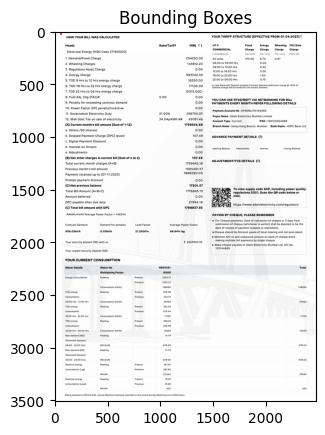

In [236]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def calculate_iou(bbox1, bbox2):
    """
    Calculate Intersection over Union (IoU) between two normalized bounding boxes.

    Parameters:
    - bbox1: Dictionary representing the first bounding box
    - bbox2: Dictionary representing the second bounding box

    Returns:
    - IoU: Intersection over Union
    """
    x1 = max(bbox1['x'], bbox2['x'])
    y1 = max(bbox1['y'], bbox2['y'])
    x2 = min(bbox1['x'] + bbox1['width'], bbox2['x'] + bbox2['width'])
    y2 = min(bbox1['y'] + bbox1['height'], bbox2['y'] + bbox2['height'])

    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    bbox1_area = bbox1['width'] * bbox1['height']
    bbox2_area = bbox2['width'] * bbox2['height']

    union_area = bbox1_area + bbox2_area - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0.0
    return iou

def visualize_boxes(image, boxes, title):
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for box in boxes:
        rect = patches.Rectangle(
            (box['x'], box['y']),
            box['width'],
            box['height'],
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)

    plt.title(title)
    plt.show()

# Example normalized bounding boxes
normalized_bbox1 = {
    'x': 50.323101777059776,
    'y': 8.31908831908832,
    'width': 8.319870759289175,
    'height': 1.0826210826210827,
    'rotation': 0
}

normalized_bbox2 = {
    'x': 51.7979797979798,
    'y': 9.888857224280422,
    'width': 4.888888888888889,
    'height': 1.139925904816187,
    'rotation': 0
}

image = plt.imread("E:/Works/narendra_tasks/invoice-ocr/docai/pocr/template_data/invoice-templates-images/Adani_Commercial_HT_II_page_2.png")

# Calculate IoU
iou = calculate_iou(normalized_bbox1, normalized_bbox2)
print(f"IoU: {iou}")

# Visualize the boxes on the image
visualize_boxes(image, [normalized_bbox1, normalized_bbox2], "Bounding Boxes")


In [26]:
def calculate_iou(bbox1, bbox2):
  """
  Calculates the Intersection over Union (IoU) between two bounding boxes.

  Args:
      bbox1: A dictionary representing the first bounding box with keys 'x', 'y', 'width', and 'height'.
      bbox2: A dictionary representing the second bounding box with the same keys.

  Returns:
      The IoU value between the two bounding boxes (float).
  """
  print("in code")
  # Calculate bottom right coordinates for each bbox
  bbox1_br_x = bbox1['x'] + bbox1['width']
  bbox1_br_y = bbox1['y'] + bbox1['height']
  bbox2_br_x = bbox2['x'] + bbox2['width']
  bbox2_br_y = bbox2['y'] + bbox2['height']

  # Determine intersection coordinates
  xmin = max(bbox1['x'], bbox2['x'])
  ymin = max(bbox1['y'], bbox2['y'])
  xmax = min(bbox1_br_x, bbox2_br_x)
  ymax = min(bbox1_br_y, bbox2_br_y)

  # Calculate intersection area (handle no overlap case)
  intersection_area = 0
  if xmax >= xmin and ymax >= ymin:
    intersection_area = (xmax - xmin) * (ymax - ymin)

  # Calculate union area
  union_area = (bbox1['width'] * bbox1['height']) + (bbox2['width'] * bbox2['height']) - intersection_area

  # Calculate and return IoU
  iou = intersection_area / union_area if union_area > 0 else 0
  return iou

normalized_bbox1 = {
    'x': 37.814458804523424,
    'y': 1.1535612535612535,
    'width': 10.177705977382876,
    'height': 1.4814814814814814,
    'rotation': 0
}

normalized_bbox2 = {
    'x': 37.964458804523424,
    'y': 1.2535612535612535,
    'width': 10.177705977382876,
    'height': 1.4814814814814814,
    'rotation': 0
}
print("iou")
iou = calculate_iou(normalized_bbox1, normalized_bbox2)
print("IoU:", iou)


iou
in code
IoU: 0.8497224893279003


In [53]:
first_list = [
    {
        "name":"Adani Commercial HT II",
        "keywords":[
              {"key":"adani", "required": True, "box":{"x":3.715670436187399,"y":1.6524216524216524,"width":7.754442649434572,"height":2.2222222222222223}},
              {"key":"COMMERCIAL", "required": True, "box":{"x":39.17609046849758,"y":3.4188034188034186,"width":8.319870759289175,"height":1.0826210826210827}},
              {"key":"HT II", "required": True, "box":{"x":36.42972536348948,"y":11.794871794871773,"width":5.217422472544567,"height":1.1396011396011383}}
          ],
        "pages":[
          "Adani_Commercial_HT_II_page_1.json",
          "Adani_Commercial_HT_II_page_2.json"
        ]
    },
    {
        "name":"Adani Commercial LT II C",
        "keywords":[
              {"key":"adani", "required": True, "box":{"x":3.715670436187399,"y":1.6524216524216524,"width":7.754442649434572,"height":2.2222222222222223}},
              {"key":"COMMERCIAL", "required": True, "box":{"x":39.17609046849758,"y":3.4188034188034186,"width":8.319870759289175,"height":1.0826210826210827}},
              {"key":"LT II (C)", "required": False, "box":{"x":36.42972536348946,"y":11.794871794871773,"width":7.8361211308640595,"height":1.139601139601139}}
          ],
        "pages":[
          "Adani_Commercial_LT_II_C_page_1.json",
          "Adani_Commercial_LT_II_C_page_2.json"
        ]
    }
]

second_list = [
    {'bbox': {'height': 1.4819036762610431,
              'width': 10.181818181818182,
              'x': 37.97979797979798,
              'y': 1.2539184952978057},
     'text_result': ' BILL OF SUPPLY'},
    {'bbox': {'height': 2.19435736677116,
              'width': 7.757575757575758,
              'x': 3.717171717171717,
              'y': 1.6528925619834711},
     'text_result': 'adani'},
    {'bbox': {'height': 2.19435736677116,
              'width': 7.757575757575758,
              'x': 3.717171717171717,
              'y': 1.6528925619834711},
     'text_result': 'adanilab'},
    {'bbox': {'height': 2.19435736677116,
              'width': 7.757575757575758,
              'x': 3.717171717171717,
              'y': 1.6528925619834711},
     'text_result': 'COMMERCIAL'},
    {'bbox': {'height': 2.19435736677116,
              'width': 7.757575757575758,
              'x': 3.717171717171717,
              'y': 1.6528925619834711},
     'text_result': 'HT II'},
    {'bbox': {'height': 1.0544314619549728,
              'width': 8.767676767676768,
              'x': 88.84848484848484,
              'y': 1.6528925619834711},
     'text_result': 'Scan QR code for'},
]

def search_keywords(first_list, second_list):
    found_keywords = set()

    for item in first_list:
        required_found = set()
        optional_found = set()

        for keyword_set in item['keywords']:
            found = False
            for text_item in second_list:
                if keyword_set['key'].lower() == text_item['text_result'].lower():
                    if keyword_set.get('required', True):
                        required_found.add(keyword_set['key'])
                    else:
                        optional_found.add(keyword_set['key'])
                    found = True
                    break

            if found and len(required_found) == len(item['keywords']):
                found_keywords.update(required_found)
                found_keywords.update(optional_found)
                break  # Stop searching within this group once all required keywords are found

        if len(required_found) == len(item['keywords']):
            break  # Stop searching for subsequent groups once all required keywords are found in this group

    return found_keywords

found_keywords = search_keywords(first_list, second_list)
print("Found keywords:", found_keywords)



Found keywords: {'HT II', 'COMMERCIAL', 'adani'}


In [114]:
def find_matching_template(templates, keywords):
  """
  Finds a template in the 'templates' list that matches all required keywords from the 'keywords' list.
  At least one optional keyword must also match.

  Args:
      templates: A list of dictionaries representing templates with "name", "keywords", and "pages" fields.
      keywords: A list of dictionaries with "text_result" and optional "bbox" fields.

  Returns:
      A dictionary representing the matched template or None if no match is found.
  """
  for template in templates:
    print("Searching Template")
    found_required = 0
    found_optional = False
    for template_keyword in template["keywords"]:
      if template_keyword["required"]:
        found = False
        for keyword in keywords:
          text = keyword["text_result"].lower().strip()
          print(f'\t{text} == {template_keyword["key"].lower()}')
          if text == template_keyword["key"].lower():
            found = True
            found_required += 1  
            print(f'\t\t{found_required}')
            break
        if not found:
          break  # Exit inner loop if a required keyword is missing in this template
      else:  # Optional keyword
        found_optional = found_optional or any(keyword["text_result"].lower().strip() == tk["key"].lower() for tk in template["keywords"])

    print("Required found:",found_required)  
    print("Total Templ kw:",len(template["keywords"]))
    print(len([kw for kw in template["keywords"] if not kw["required"]]))
    print()
    if found_required == len(template["keywords"]) - len([kw for kw in template["keywords"] if not kw["required"]]):
        # All required keywords and at least one optional keyword found
        return template

  return None  # No matching template found

# Example usage with potentially matching data
templates = [
  {
    "name": "Adani Commercial HT II",
    "keywords": [
      {"key": "adani", "required": True},
      {"key": "COMMERCIAL", "required": True},  # Replace with actual keyword
      {"key": "HT II", "required": True},
    ],
    "pages": [
      "Adani_Commercial_HT_II_page_1.json",
      "Adani_Commercial_HT_II_page_2.json",
    ],
  },
  {
    "name": "Adani Commercial LT II C",
    "keywords": [
      {"key": "adani", "required": True},
      {"key": "COMMERCIAL", "required": True},  # Replace with actual keyword
      {"key": "LT II (C)", "required": True},
      {"key": "LTII (C)", "required": False},
    ],
    "pages": [
      "Adani_Commercial_LT_II_C_page_1.json",
      "Adani_Commercial_LT_II_C_page_2.json",
    ],
  },
]

keywords = [
  {'text_result': 'COMMERCIAL'},
  {'text_result': 'adani'},
  {'text_result': '(24x7 Powedline)'},
  {'text_result': 'LT II (C)'},
  {'text_result': 'REGISTERED OFFICE ADDRESS'},
  {'text_result': 'Scan QR code for'}
]

matched_template = find_matching_template(templates, keywords)

if matched_template:
  print(f"Matching template: {matched_template['name']}")
else:
  print("No matching template found")


Searching Template
	commercial == adani
	adani == adani
		1
	commercial == commercial
		2
	commercial == ht ii
	adani == ht ii
	(24x7 powedline) == ht ii
	lt ii (c) == ht ii
	registered office address == ht ii
	scan qr code for == ht ii
Required found: 2
Total Templ kw: 3
0

Searching Template
	commercial == adani
	adani == adani
		1
	commercial == commercial
		2
	commercial == lt ii (c)
	adani == lt ii (c)
	(24x7 powedline) == lt ii (c)
	lt ii (c) == lt ii (c)
		3
Required found: 3
Total Templ kw: 4
1

Matching template: Adani Commercial LT II C


### PDF margin check and adjust

In [117]:
import fitz  # PyMuPDF

def adjust_outer_margins(pdf_path, master_template_path):
    # Open the document and master template
    doc = fitz.open(pdf_path)
    template = fitz.open(master_template_path)

    # Get the size of the first page of the master template
    template_page = template[0]
    template_width = template_page.rect.width
    template_height = template_page.rect.height

    # Iterate through pages of the document
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)

        # Calculate the difference in margins between the document and the template
        doc_width = page.rect.width
        doc_height = page.rect.height

        left_margin_diff = (doc_width - template_width) / 2
        top_margin_diff = (doc_height - template_height) / 2
        right_margin_diff = left_margin_diff
        bottom_margin_diff = top_margin_diff

        print(right_margin_diff,bottom_margin_diff)
        # Ensure the crop box is within the page's boundaries
        crop_box = (left_margin_diff, bottom_margin_diff, doc_width - right_margin_diff, doc_height - top_margin_diff)
        crop_box = fitz.Rect(crop_box).intersect(page.rect)

        # Set the crop box
        page.set_cropbox(crop_box)

    # Save the adjusted document
    adjusted_pdf_path = pdf_path.replace('.pdf', '_adjusted.pdf')
    doc.save(adjusted_pdf_path)
    doc.close()
    template.close()

    return adjusted_pdf_path


# Example usage
pdf_path = 'E:/Works/narendra_tasks/invoice-ocr/sample_bills/FW Electricity Bills of Various Vendors/LT II C TATA.pdf'
master_template_path = 'E:/Works/narendra_tasks/invoice-ocr/docai/pocr/template_data/invoice-templates-pdf/Tata_Commercial_LT_II_C.PDF'
adjusted_pdf_path = adjust_outer_margins(pdf_path, master_template_path)
print(f"Adjusted PDF saved to: {adjusted_pdf_path}")


0.100006103515625 -0.160003662109375
0.100006103515625 -0.160003662109375
0.100006103515625 -0.160003662109375
Adjusted PDF saved to: E:/Works/narendra_tasks/invoice-ocr/sample_bills/FW Electricity Bills of Various Vendors/LT II C TATA_adjusted.pdf


In [18]:
from PIL import Image

def reduce_margin_with_threshold(image_path, threshold):
  """
  Reduces margin space around an image by a specified pixel threshold.

  Args:
      image_path: Path to the image file.
      threshold: Number of pixels to remove from each side of the margin.

  Returns:
      A new image with reduced margin space.
  """
  img = Image.open(image_path)
  if img.mode == 'RGBA':
    img = img.convert('RGB')  # Convert to RGB for JPEG compatibility
  img.save(image_path, format='JPEG')
  # Get image dimensions
  width, height = img.size

  # Crop the image with specified threshold
  new_box = (threshold, threshold, width - threshold, height - threshold)
  img = img.crop(new_box)
  return img
    
# Example usage
image_path = "E:/Works/narendra_tasks/invoice-ocr/sample_bills/FW Electricity Bills of Various Vendors/process/temp/LT II C TATA_page_1.png"
threshold = 60  # Number of pixels to remove from each side

new_image = reduce_margin_with_threshold(image_path, threshold)
new_image.save("image_with_reduced_margin.jpg")

In [27]:
import math

def euclidean_distance(bbox1, bbox2):
    # Calculate the center coordinates of each bounding box
    center_x1 = bbox1['x'] + bbox1['width'] / 2
    center_y1 = bbox1['y'] + bbox1['height'] / 2
    center_x2 = bbox2['x'] + bbox2['width'] / 2
    center_y2 = bbox2['y'] + bbox2['height'] / 2

    # Calculate the Euclidean distance between the centers
    distance = math.sqrt((center_x1 - center_x2)**2 + (center_y1 - center_y2)**2)
    return distance

# Example bounding boxes
bbox1 = {'x': 54.758064516129046, 'y': 22.9833761056596, 'width': 34.677419354838705, 'height': 1.3679110857794243}
bbox2 = {'x': 54.596774193548384, 'y': 24.779013401767894, 'width': 32.74193548387097, 'height': 1.3686911890504705}

#bbox1 = {'x': 36.42972536348948, 'y': 11.794871794871773, 'width': 5.217422472544567, 'height': 1.1396011396011383}
#bbox2 = {'x': 36.44444444444444, 'y': 11.883727557708749, 'width': 3.1515151515151514, 'height': 0.8264462809917356}

# Calculate the Euclidean distance between the centers of the two bounding boxes
distance = euclidean_distance(bbox1, bbox2)
print("Euclidean distance between the centers:", distance)

Euclidean distance between the centers: 2.0136920616227947


In [33]:
from PIL import Image

def get_image_attributes(image_path):
  """
  This function takes an image path as input and returns a dictionary containing
  image attributes like width, height, resolution, and DPI.

  Args:
      image_path: Path to the image file.

  Returns:
      A dictionary containing image attributes or None if there's an error.
  """
  try:
    with Image.open(image_path) as image:
      width, height = image.size
      resolution = f"{width}x{height}"
      dpi = image.info.get('dpi')
      attributes = {
          "Width": width,
          "Height": height,
          "Resolution": resolution,
          "DPI": dpi
      }
      return attributes
  except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
  except Exception as e:
    print(f"Error: An error occurred while processing the image: {e}")
  return None

if __name__ == "__main__":
  image_path = "E:/Works/narendra_tasks/invoice-ocr/sample_bills/FW Electricity Bills of Various Vendors/process/temp/2cropped_xerox_copy_image.jpg"  # Replace with your image path
  attributes = get_image_attributes(image_path)
  if attributes:
    print("Image Attributes:")
    for key, value in attributes.items():
      print(f"{key}: {value}")
  else:
    print("Failed to retrieve image attributes.")


Image Attributes:
Width: 2475
Height: 3509
Resolution: 2475x3509
DPI: None


In [34]:
import cv2
import numpy as np

def detect_extra_blank_space(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the grayscale image to find contours
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the bounding box of the largest contour (outermost edge)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        return x, y, w, h
    else:
        return None

def crop_image(image, x, y, w, h):
    cropped_image = image[y:y+h, x:x+w]
    return cropped_image

# Load original and xerox copy images
original_image = cv2.imread('E:/Works/narendra_tasks/invoice-ocr/sample_bills/FW Electricity Bills of Various Vendors/process/temp/Adani_Commercial_HT_II_page_1.png')
xerox_copy_image = cv2.imread('E:/Works/narendra_tasks/invoice-ocr/sample_bills/FW Electricity Bills of Various Vendors/process/temp/153144669 Com I Commona area Feb_24_page_1.png')

# Detect extra blank space in the original image
x, y, w, h = detect_extra_blank_space(original_image)
print(x, y, w, h)
if x is not None:
    # Crop original image
    cropped_original_image = crop_image(original_image, x, y, w, h)
    
    # Apply same cropping to xerox copy image
    cropped_xerox_copy_image = crop_image(xerox_copy_image, x, y, w, h)
    
    # Save cropped images
    cv2.imwrite('cropped_original_image.jpg', cropped_original_image)
    cv2.imwrite('cropped_xerox_copy_image.jpg', cropped_xerox_copy_image)
    
    print("Extra blank space detected and cropped successfully.")
else:
    print("No extra blank space detected in the original image.")



0 0 2475 3509
Extra blank space detected and cropped successfully.
